In [1]:
### Ecosystem Imports ###
from typing import Union
import pathlib

### External Imports ###
import numpy as np
import torch as tc
import matplotlib.pyplot as plt

### DeeperHistReg Imports ###
import deeperhistreg

from deeperhistreg.dhr_input_output.dhr_loaders import pil_loader
from deeperhistreg.dhr_input_output.dhr_loaders import tiff_loader
from deeperhistreg.dhr_pipeline.registration_params import default_initial_nonrigid

In [2]:
### Load ANHIR cases ###

source_path = None #TODO
target_path = None #TODO

source_loader = pil_loader.PILLoader(source_path) ### Use tiff_loader for .tiff files
target_loader = pil_loader.PILLoader(target_path) ### Use tiff_loader for .tiff files

source = source_loader.load_level(level=0)
target = target_loader.load_level(level=0)

print(f"Source shape: {source.shape}")
print(f"Target shape: {target.shape}")

Source shape: (2233, 8008, 3)
Target shape: (2946, 9412, 3)


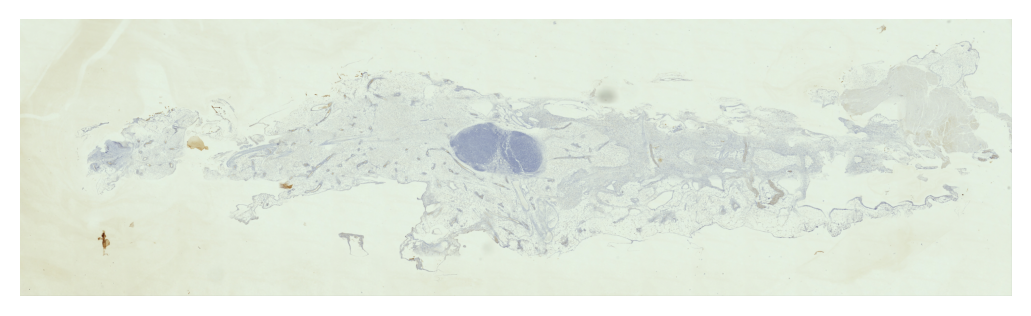

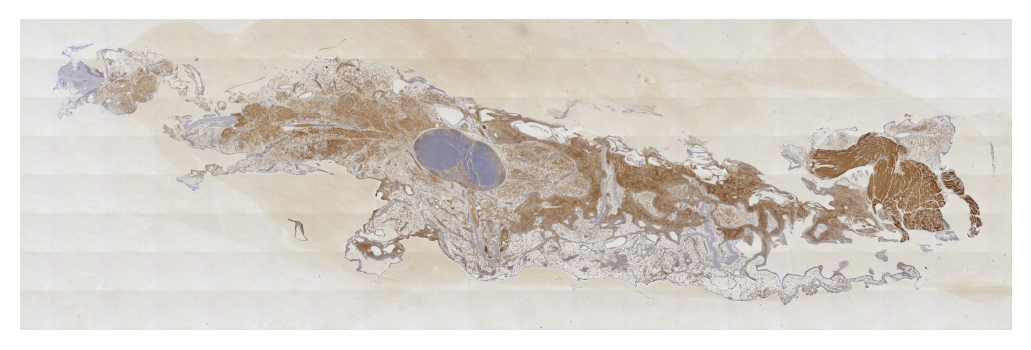

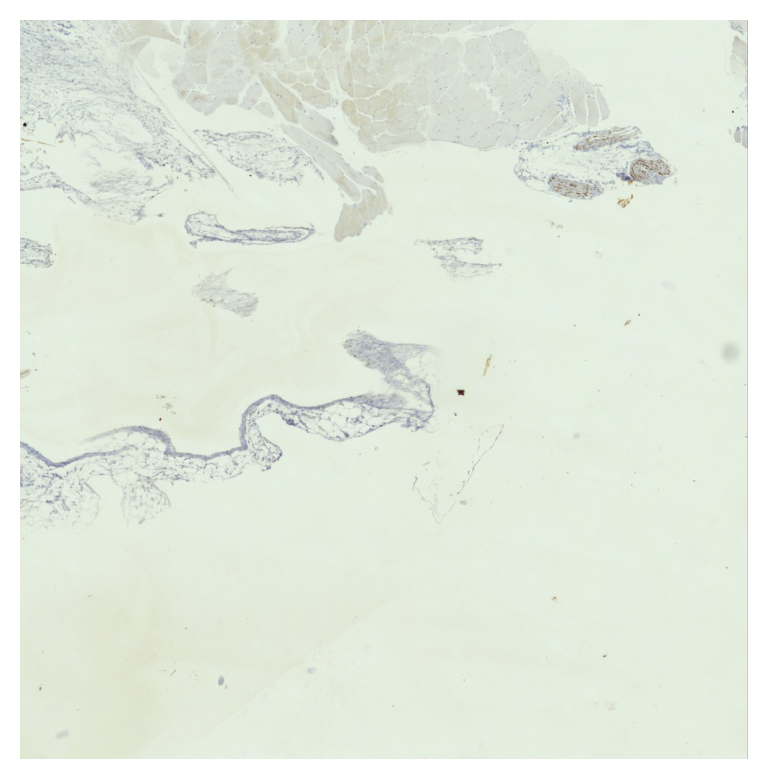

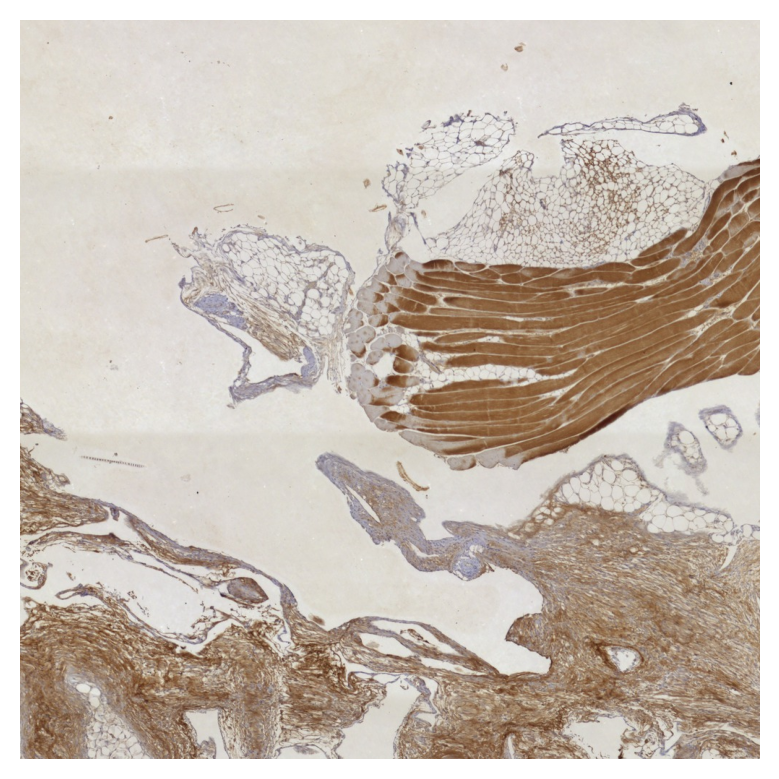

In [3]:
### Show loaded cases before registration  ###

plt.figure(dpi=200)
plt.imshow(source)
plt.axis('off')

plt.figure(dpi=200)
plt.imshow(target)
plt.axis('off')

source_patch = source_loader.load_region(level=0, offset=(900, 7000), shape=(1024, 1024))
target_patch = target_loader.load_region(level=0, offset=(900, 7000), shape=(1024, 1024))

plt.figure(dpi=200)
plt.imshow(source_patch)
plt.axis('off')

plt.figure(dpi=200)
plt.imshow(target_patch)
plt.axis('off')

plt.show()

In [4]:
### Run Registration ###

output_path = None #TODO

### Define Inputs/Outputs ###
source_path = pathlib.Path(source_path)
target_path = pathlib.Path(target_path)
output_path = pathlib.Path(output_path)

### Define Params ###
registration_params : dict = default_initial_nonrigid()
registration_params['loading_params']['loader'] = 'pil' # For .jpg or .png formats
save_displacement_field : bool = True # Whether to save the displacement field (e.g. for further landmarks/segmentation warping)
copy_target : bool = True # Whether to copy the target (e.g. to simplify the further analysis
delete_temporary_results : bool = False # Whether to keep the temporary results
case_name : str = f"{source_path.stem}_{target_path.stem}" # Used only if the temporary_path is important, otherwise - provide whatever
temporary_path : Union[str, pathlib.Path] = output_path / f"{pathlib.Path(source_path).stem}_{pathlib.Path(target_path).stem}_TEMP" # Will use default if set to None

### Create Config ###
config = dict()
config['source_path'] = source_path
config['target_path'] = target_path
config['output_path'] = output_path
config['registration_parameters'] = registration_params
config['case_name'] = case_name
config['save_displacement_field'] = save_displacement_field
config['copy_target'] = copy_target
config['delete_temporary_results'] = delete_temporary_results
config['temporary_path'] = temporary_path

### Run Registration ###
deeperhistreg.run_registration(**config)

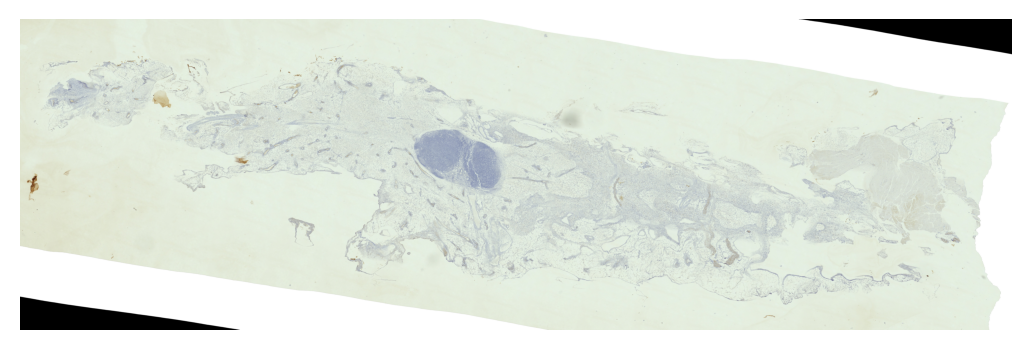

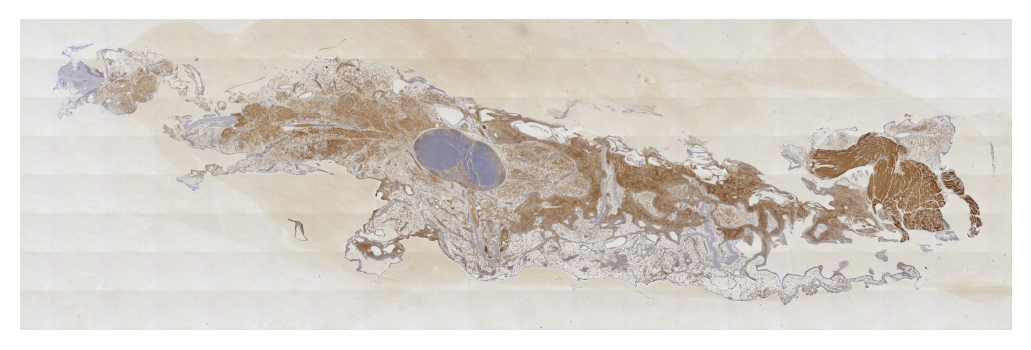

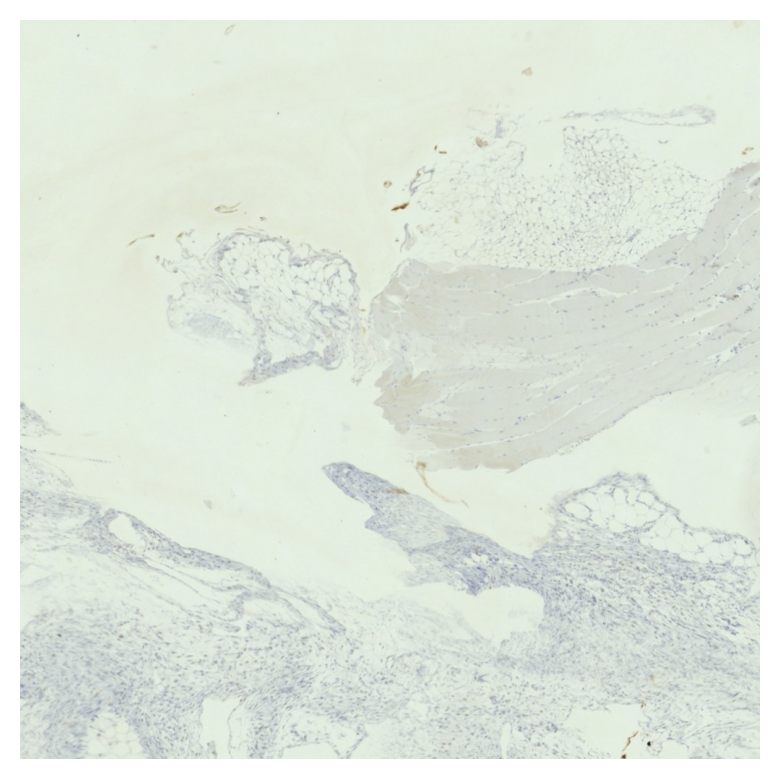

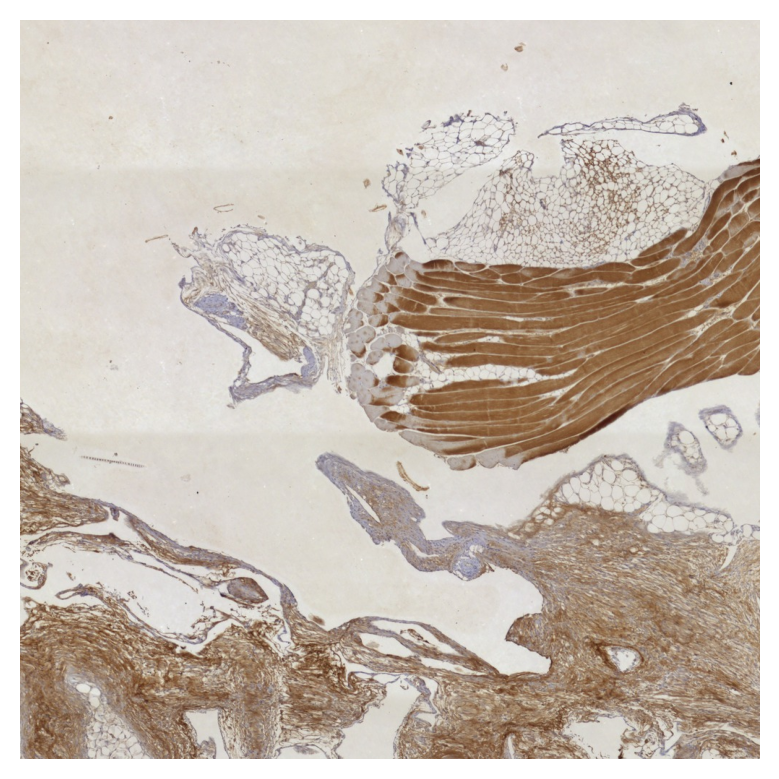

In [6]:
### Show cases after registration ###

source_path = None #TODO
target_path = None #TODO

source_loader = tiff_loader.TIFFLoader(source_path)
target_loader = pil_loader.PILLoader(target_path)


source = source_loader.load_level(level=0)
target = target_loader.load_level(level=0)

source_patch = source_loader.load_region(level=0, offset=(900, 7000), shape=(1024, 1024))
target_patch = target_loader.load_region(level=0, offset=(900, 7000), shape=(1024, 1024))


plt.figure(dpi=200)
plt.imshow(source)
plt.axis('off')

plt.figure(dpi=200)
plt.imshow(target)
plt.axis('off')

plt.figure(dpi=200)
plt.imshow(source_patch)
plt.axis('off')

plt.figure(dpi=200)
plt.imshow(target_patch)
plt.axis('off')

plt.show()

